#**21162101012_CBA_Yash_Lakhtariya**
<hr>

#**ML Practical 1**
<hr>

###Aim - Exploratory data analysis in car price prediction dataset


####**1. Import dataset available at given url :**
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path, na_values="?", header=None)

# Define the headers
headers = [
    "symboling",
    "normalized-losses",
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-type",
    "num-of-cylinders",
    "engine-size",
    "fuel-system",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price",
]
df.columns = headers

print("First 5 rows of the dataframe :\n")
print(df.head())


First 5 rows of the dataframe :

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130 

####**2. Clean dataset.(hint: Replace missing values)**


In [28]:
# Replacing missing values with mean
df['normalized-losses'].replace('?', np.nan, inplace=True)
df['bore'].replace('?', np.nan, inplace=True)
df['stroke'].replace('?', np.nan, inplace=True)
df['horsepower'].replace('?', np.nan, inplace=True)
df['peak-rpm'].replace('?', np.nan, inplace=True)
df['num-of-doors'].replace('?', np.nan, inplace=True)

# Missing values
df['normalized-losses'].fillna(df['normalized-losses'].astype('float').mean(), inplace=True)
df['bore'].fillna(df['bore'].astype('float').mean(), inplace=True)
df['stroke'].fillna(df['stroke'].astype('float').mean(), inplace=True)
df['horsepower'].fillna(df['horsepower'].astype('float').mean(), inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].astype('float').mean(), inplace=True)
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

# Convert data types to appropriate formats
df['price'] = df['price'].replace('?', np.nan).astype('float')
df.dropna(subset=['price'], inplace=True)  # Remove rows with NaN values in 'price'

df['price'] = df['price'].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')

print("After data preprocessing :\n")
print(df.head())

After data preprocessing :

   symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130      

####**3. Feature extraction using visualization (hint: matplotlib or seaborn graphs) Only regplots of continuous attributes**

####3.1 Visualization of different features' effect on price feature

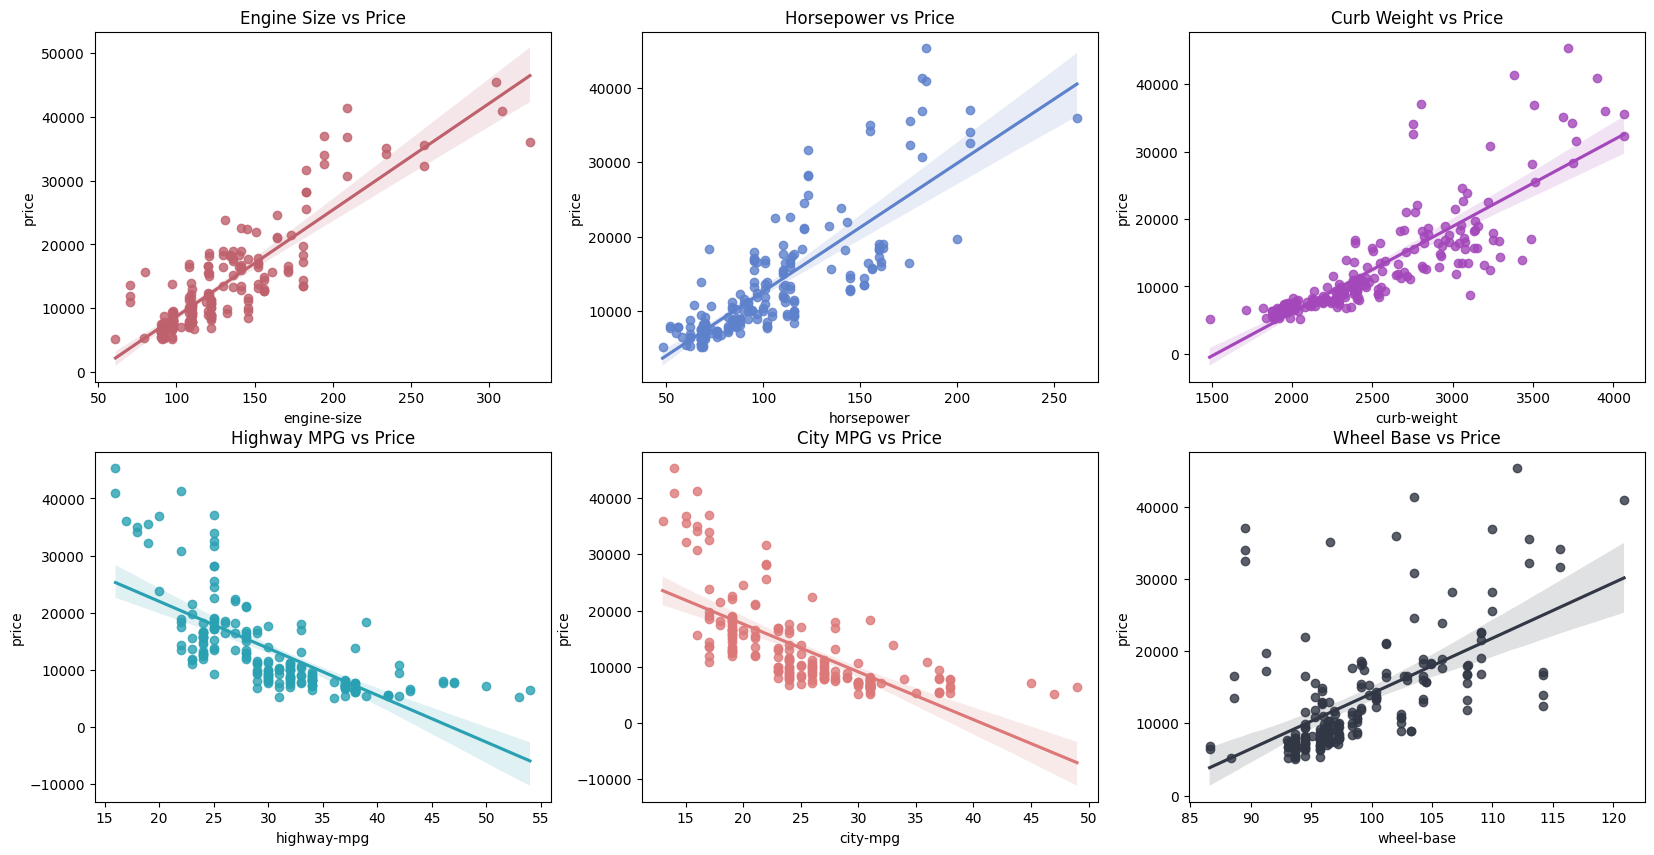

In [29]:
# Effect of diff features on price
plt.figure(figsize=(20, 10))

# Effect of engine-size on price
plt.subplot(2, 3, 1)
sns.regplot(x='engine-size', y='price', data=df, color='#bf616c')
plt.title('Engine Size vs Price')

# Effect of horsepower on price
plt.subplot(2, 3, 2)
sns.regplot(x='horsepower', y='price', data=df, color='#5e81cc')
plt.title('Horsepower vs Price')

# Effect of curb-weight on price
plt.subplot(2, 3, 3)
sns.regplot(x='curb-weight', y='price', data=df, color='#a347ba')
plt.title('Curb Weight vs Price')

# Effect of highway-mpg on price
plt.subplot(2, 3, 4)
sns.regplot(x='highway-mpg', y='price', data=df, color='#2aa1b3')
plt.title('Highway MPG vs Price')

# Effect of city-mpg on price
plt.subplot(2, 3, 5)
sns.regplot(x='city-mpg', y='price', data=df, color='#dd7878')
plt.title('City MPG vs Price')

# Effect of wheel-base on price
plt.subplot(2, 3, 6)
sns.regplot(x='wheel-base', y='price', data=df, color='#313744')
plt.title('Wheel Base vs Price')

plt.show()

####3.2 Features extraction

In [30]:
correlations = df[['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'city-mpg', 'wheel-base', 'price']].corr()
price_correlation = correlations['price'].sort_values(ascending=False)

print("\nPearson Correlation Coefficients :\n")
print(price_correlation)

print("\n\nMost influential features on price (absolute correlation) :\n")
print(price_correlation.abs().sort_values(ascending=False).drop('price'))


Pearson Correlation Coefficients :

price          1.000000
engine-size    0.872335
curb-weight    0.834415
horsepower     0.809575
wheel-base     0.584642
city-mpg      -0.686571
highway-mpg   -0.704692
Name: price, dtype: float64


Most influential features on price (absolute correlation) :

engine-size    0.872335
curb-weight    0.834415
horsepower     0.809575
highway-mpg    0.704692
city-mpg       0.686571
wheel-base     0.584642
Name: price, dtype: float64
